<img src="vejle.jpg" width="500" height="400" align="right"/>

# Population Development within Vejle Municipality
### 02806 Social Data Analysis and Visualization F19

_by Christian Arendt Rasmussen s144466, Miguel Cunha s182550 & Clara Foss s154312_

### 1. Motivation
The Municipality of Vejle has since 2015 collected populaation demographic data. Our goal is to extract as much information as possible through interactive visualizations and data analysis.
More specifically, the purpose is to explore population development in different city districts within Vejle Kommune, revealing cities in demand, as well as demographic information, such as age groups and gender ratio.

The region can use these insights to proactively meet demographic challenges, such as an aging population.
This would allow the decision makers to re-allocate resources among the cities more efficiently, to benefit the ones in need.

#### Data

For this purpose, we have two datasets:
-  _populationdata.csv_ (32 KB)
    -  Consists of 366 quarterly observations from 2015-2018
    -  Contains 23 variables including different gender-based age groups, and cities.
    -  Downloaded from https://portal.opendata.dk/dataset/folketal-fordelt-pa-postnummer?fbclid=IwAR3bN4-oc_vvQotNc9uUByW5YXOTszGRNkiotXFpypZEZ7ht_Zmcjnp1Skk
-  _coordinates.csv_ (1 KB)
    -  Contains the 31 different cities
    -  Longitude and latitudes for the different cities
    -  Extracted manually from https://www.gps-coordinates.net/
    
The poopulation dataset was particularly interesting because it contained different cities, which can easily be visualized with the folium package. However, the longitudes and latitudes were needed for this purpose, so we had to manually extract them. Moreover, this was more of niche project, which hopefully could be useful to Vejle Municipality, which is more motivating to us, rather than a highly explored American dataset.

### 2. Basic stats
The cities included in the datasets are:


Andkær, Assendrup, Bredal, Bredsten, Brejning/Kellers Park, Børkop, Egtved, Engum, Gadbjerg, Give, Givskud, Gl Højen, Gravens/Ågård, Grejs, Gårslev, Hornstrup Mølleby, Jelling, Jerlev, Kirkeby, Langelund-Grønbjerg, Nr Vilstrup, Ny Højen, Nørup, Skibet, Skærup, Smidstrup, Thyregod, Vandel, Vejle, Vonge, Ødsted, and
Brejning, and these can be seen in the folium-map below.

You can click on the circles to see the city names!

In [3]:
#### Importing packages ####
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.utils import shuffle
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
from numpy.random import randint
np.random.seed(42)
plt.style.use('ggplot')
%matplotlib inline
#plt.rcParams['figure.figsize'] = (6, 4)
import folium
from IPython.display import Image

In [4]:
#### Loading datasets ####
data = pd.read_csv("finalpopulationdata.csv",sep=',',encoding='utf-8') 
data = data.drop('Unnamed: 0',axis=1)
coord = pd.read_csv("coordinates.csv",sep=';',encoding='ANSI')

In [5]:
data.columns

Index(['yearmonth', 'quarter', 'year', 'city', 'female1', 'female2', 'female3',
       'female4', 'female5', 'female6', 'female7', 'female8', 'totalfemale',
       'male1', 'male2', 'male3', 'male4', 'male5', 'male6', 'male7', 'male8',
       'totalmale', 'totalcitypop'],
      dtype='object')

In [6]:
lat = list(coord["latitude"])
lon = list(coord["longitude"])
cities = list(coord["city"])
m = folium.Map(location=[lat[1], lon[2]], zoom_start=9, tiles="openstreetmap",min_zoom = 7)
fgv = folium.FeatureGroup(name="city")
for i in range(coord.shape[0]):
    fgv.add_child(folium.CircleMarker(location=[coord["latitude"].loc[i], coord["longitude"].loc[i]], popup=coord["city"].loc[i],radius = 8,fill=True,  color = 'tomato', fill_opacity=0.7))

m.add_child(fgv)

We had to make some choices with regard to the data. Since the data contains age intervals, we have changed these to categories for women and men, respectively:
-  0-2 years &rarr; female1, male1
-  3-5 years &rarr; female2, male2
-  6-16 years &rarr; female3, male3
-  17-24 years &rarr; female4, male4
-  25-39 years &rarr; female5, male5
-  40-64 years &rarr; female6, male6
-  65-79 years &rarr; female7, male7
-  80 years and above &rarr; female8, male8

#### Exploratory data analysis
Here are some descriptive statistics:

It appears the total population in the region has been growing the past few years:


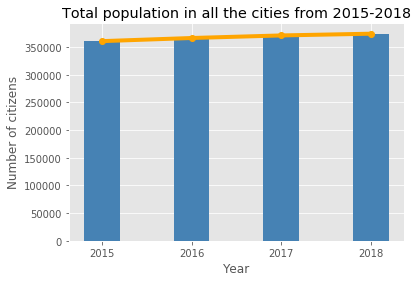

In [530]:
sub15 = data[data["year"] == 2015]
sub16 = data[data["year"] == 2016]
sub17 = data[data["year"] == 2017]
sub18 = data[data["year"] == 2018]
df = pd.concat([sub15,sub16,sub17,sub18])



focuscities = ['Vejle', 'Andkær', 'Bredal', 'Bredsten', 'Brejning', 'Børkop',
       'Egtved', 'Gadbjerg', 'Give', 'Givskud', 'Gravens/Ågård', 'Grejs',
       'Gårslev', 'Jelling', 'Jerlev', 'Ny Højen', 'Nørup', 'Skibet',
       'Skærup', 'Smidstrup', 'Thyregod', 'Vandel', 'Vonge', 'Ødsted']
focusmonths = ['2015-03', '2015-06', '2015-09', '2015-12', '2016-03', '2016-06',
       '2016-09', '2016-12', '2017-03', '2017-06', '2017-09', '2017-12',
       '2018-03', '2018-06', '2018-09', '2018-12']
df = df[df['city'].isin(focuscities)]
df = df[df['yearmonth'].isin(focusmonths)]

df = df.groupby(['year']).sum()
df.head()
plt.bar(x=["2015","2016","2017","2018"],height=df['totalcitypop'],width=0.4,color = "steelblue")
plt.plot([0,1,2,3], df['totalcitypop'], '-o', color='orange',linewidth=4)
plt.ylabel('Number of citizens')
plt.xlabel('Year')
plt.title('Total population in all the cities from 2015-2018')
#df.plot(kind='bar', stacked=True)
print("It appears the total population in the region has been growing the past few years:")

<function matplotlib.pyplot.show(*args, **kw)>

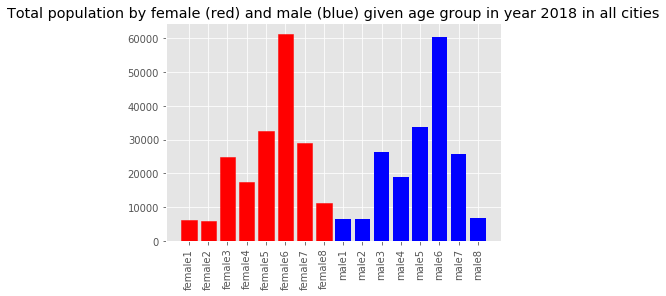

In [531]:
df_gender = sub18[["female1","female2","female3","female4","female5","female6","female7","female8","male1","male2","male3","male4","male5","male6","male7","male8"]]
df_sum = df_gender.sum()
barlist = plt.bar(df_gender.columns, np.array(df_sum),color = "blue")
plt.xticks([i for i in range(df_gender.shape[1])],
           df_gender.columns, rotation='vertical')

for i in range(8):
    barlist[i].set_color("red")
plt.title("Total population by female (red) and male (blue) given age group in year 2018 in all cities")
plt.show

### 3. Data Analysis

Making predictions of the population development. For simplicity, it is assumed that the trend is linear. This will be further discussed in Section 6.

For this, we will need for each city: 
-  Total population for 2015, 2016, 2017 and 2018
-  Each time point needs a time index (counter), let's call it time
-  So that's one linear regression for each city
-  This could be validated with the 2019 data we have

Each city has its own linear regression model:

$Y_{t} = \beta_{0} + \beta_{1}X_{t} + u_{t}$, for $t \in \{1,..,T\}$

Where $u_{t}$ is some sort of noise in the system. We want to estimate the regression coefficients $\beta_{0}$ and $\beta_{1}$ (intercept and slope) specifically for each city. To estimate these, we need to maximize the log-likelihood function with respect to $\beta_{0}$ and $\beta_{1}$, and this is equivalent to minimizing the *Sum of Squared Deviations*, (least squares) [1] :

$SSD(\beta_{0}, \beta_{1}) = \sum_{t=1}^{T}(Y_{t}-\beta_{0}-\beta_{1}X_{t})^2 $

Luckily for us, this is a built-in function in the python stats library.
These regressors can be used to make predictions of the population growth up to $T+1,T+2,T+3,T+4$, meaning $Y_{2019-1}, Y_{2019-2}, Y_{2019-3}$ and $Y_{2019-4}$, where $\{1,2,3,4\}$ denote the four quarters in 2019.

Firstly, we estimate the slopes and intercepts for each city:

In [533]:
#### Linear Regression ####
focuscities = ['Vejle', 'Andkær', 'Bredal', 'Bredsten', 'Brejning', 'Børkop',
       'Egtved', 'Gadbjerg', 'Give', 'Givskud', 'Gravens/Ågård', 'Grejs',
       'Gårslev', 'Jelling', 'Jerlev', 'Ny Højen', 'Nørup', 'Skibet',
       'Skærup', 'Smidstrup', 'Thyregod', 'Vandel', 'Vonge', 'Ødsted']
time = [i+1 for i in range(focuscity['year'].shape[0])]
regressionmatrix = np.zeros((len(data['city'].unique()),2))

for i in range(len(focuscities)):
    focuscity = data.loc[data["city"] == focuscities[i]]
    beta1, beta0,_,_,_ = stats.linregress(time, focuscity["totalcitypop"])
    regressionmatrix[i][0] = beta0
    regressionmatrix[i][1] = beta1

print("Intercepts and slopes for each city:\n\n", regressionmatrix)

Intercepts and slopes for each city:

 [[ 5.44261750e+04  2.02523529e+02]
 [ 3.20750000e+02 -8.97058824e-01]
 [ 6.17750000e+02  1.49264706e+00]
 [ 1.67227500e+03 -2.43676471e+00]
 [ 2.82112500e+03  1.15000000e+01]
 [ 5.17970000e+03  2.79764706e+01]
 [ 2.28005000e+03  7.58970588e+00]
 [ 7.35825000e+02  4.00588235e+00]
 [ 4.59260000e+03  4.67205882e+00]
 [ 6.25500000e+02 -1.46323529e+00]
 [ 1.28597500e+03  3.39264706e+00]
 [ 1.04237500e+03  3.34558824e+00]
 [ 1.09487500e+03 -1.05147059e+00]
 [ 3.41400000e+03  7.35294118e+00]
 [ 6.93950000e+02 -1.70000000e+00]
 [ 7.04250000e+02 -4.26470588e-01]
 [ 7.22150000e+02 -9.51470588e-01]
 [ 2.01035000e+03  8.15000000e+00]
 [ 4.99325000e+02  6.89705882e-01]
 [ 7.63550000e+02  6.48529412e-01]
 [ 1.34547500e+03  2.84117647e+00]
 [ 7.71825000e+02  1.20441176e+00]
 [ 5.95925000e+02  1.48529412e-01]
 [ 1.43222500e+03  1.59852941e+00]]


Then we make the predictions for each city. We choose to predict the next four quarters of 2019:

In [516]:
quarterly_prediction = [i+1 for i in range(16,20)]
citypop_projections = np.zeros((len(data['city'].unique()),len(quarterly_prediction)))

for i in range(citypop_projections.shape[0]):
    for j in range(len(quarterly_prediction)):
        citypop_projections[i][j] =  regressionmatrix[i][0]+regressionmatrix[i][1]*quarterly_prediction[j]
print("City population projections for Vejle, Andkær Bredal, etc.:\n\n", citypop_projections)

City population projections for Vejle, Andkær Bredal, etc.:

 [[57869.075      58071.59852941 58274.12205882 58476.64558824]
 [  305.5          304.60294118   303.70588235   302.80882353]
 [  643.125        644.61764706   646.11029412   647.60294118]
 [ 1630.85        1628.41323529  1625.97647059  1623.53970588]
 [ 3016.625       3028.125       3039.625       3051.125     ]
 [ 5655.3         5683.27647059  5711.25294118  5739.22941176]
 [ 2409.075       2416.66470588  2424.25441176  2431.84411765]
 [  803.925        807.93088235   811.93676471   815.94264706]
 [ 4672.025       4676.69705882  4681.36911765  4686.04117647]
 [  600.625        599.16176471   597.69852941   596.23529412]
 [ 1343.65        1347.04264706  1350.43529412  1353.82794118]
 [ 1099.25        1102.59558824  1105.94117647  1109.28676471]
 [ 1077.          1075.94852941  1074.89705882  1073.84558824]
 [ 3539.          3546.35294118  3553.70588235  3561.05882353]
 [  665.05         663.35         661.65         659.95 

Saving these intercepts and coefficients in a csv-file for later use in observable.

In [584]:
def column(matrix, i):
    return [row[i] for row in matrix]

regressors = pd.DataFrame(columns=['city','intercept','slope','predicted_growthrate'])
regressors['city'] = focuscities
regressors['intercept'] = column(regressionmatrix,0)
regressors['slope'] = column(regressionmatrix,1)

growth = np.zeros(24)
for i in range(citypop_projections.shape[0]):
    # ((final_value - start_value)/start_value)*100
    growth[i] = ((column(citypop_projections,3)[i] - column(citypop_projections,0)[i])/(column(citypop_projections,0)[i]))*100

regressors['predicted_growthrate'] = growth 
print(regressors)

             city  intercept       slope  predicted_growthrate
0           Vejle  54426.175  202.523529              1.049905
1          Andkær    320.750   -0.897059             -0.880909
2          Bredal    617.750    1.492647              0.696279
3        Bredsten   1672.275   -2.436765             -0.448251
4        Brejning   2821.125   11.500000              1.143662
5          Børkop   5179.700   27.976471              1.484084
6          Egtved   2280.050    7.589706              0.945139
7        Gadbjerg    735.825    4.005882              1.494872
8            Give   4592.600    4.672059              0.300002
9         Givskud    625.500   -1.463235             -0.730856
10  Gravens/Ågård   1285.975    3.392647              0.757485
11          Grejs   1042.375    3.345588              0.913056
12        Gårslev   1094.875   -1.051471             -0.292889
13        Jelling   3414.000    7.352941              0.623307
14         Jerlev    693.950   -1.700000             -0

In [587]:
regressors.to_csv("regressors.csv", sep = ',',encoding = "ANSI", header = True)

Now we need to make this into a format which can be used in Observable.
For each city we need to extend the number of observations by four, meaning the four quarters with the predictions. Starting with Vejle:

In [517]:
# Merging population data with coordinates data
data1 = pd.merge(data, coord, on='city')
data1['year_quarter'] = data1['year'].astype(str) +'_'+ data1['quarter'].astype(str)
data2 = data1[['city','totalcitypop','latitude','longitude','year_quarter']]

In [518]:
# Adding the four quarters
df_proj = data2.loc[data1["city"] == focuscities[0],]
df_to_add = pd.DataFrame(columns=['city','totalcitypop','latitude','longitude','year_quarter'],
                        data = np.zeros((4,5)))
df_with_projections = pd.concat([df_proj,df_to_add],ignore_index=True)

yearquarters = ['2019_1','2019_2','2019_3','2019_4']
    
for i in range(1,5):    
    df_with_projections.loc[i+15,'year_quarter'] = yearquaters[i-1]
    df_with_projections.loc[i+15,'totalcitypop'] = citypop_projections[0,i-1] # should only grab the last 4 obs of 19 
    
for i in range(16,20):
    df_with_projections.loc[i,'city'] = focuscities[0]
    df_with_projections.loc[i,'latitude'] = df_with_projections.loc[0,'latitude']
    df_with_projections.loc[i,'longitude'] = df_with_projections.loc[0,'longitude']

print(df_with_projections)

     city  totalcitypop   latitude  longitude year_quarter
0   Vejle  54525.000000  55.700006   9.533324       2015_1
1   Vejle  54647.000000  55.700006   9.533324       2015_2
2   Vejle  54937.000000  55.700006   9.533324       2015_3
3   Vejle  55176.000000  55.700006   9.533324       2015_4
4   Vejle  55490.000000  55.700006   9.533324       2016_1
5   Vejle  55694.000000  55.700006   9.533324       2016_2
6   Vejle  56024.000000  55.700006   9.533324       2016_3
7   Vejle  56227.000000  55.700006   9.533324       2016_4
8   Vejle  56364.000000  55.700006   9.533324       2017_1
9   Vejle  56526.000000  55.700006   9.533324       2017_2
10  Vejle  56760.000000  55.700006   9.533324       2017_3
11  Vejle  56960.000000  55.700006   9.533324       2017_4
12  Vejle  57064.000000  55.700006   9.533324       2018_1
13  Vejle  57232.000000  55.700006   9.533324       2018_2
14  Vejle  57269.000000  55.700006   9.533324       2018_3
15  Vejle  57467.000000  55.700006   9.533324       2018

Visualizing the population growth in Vejle specifically:

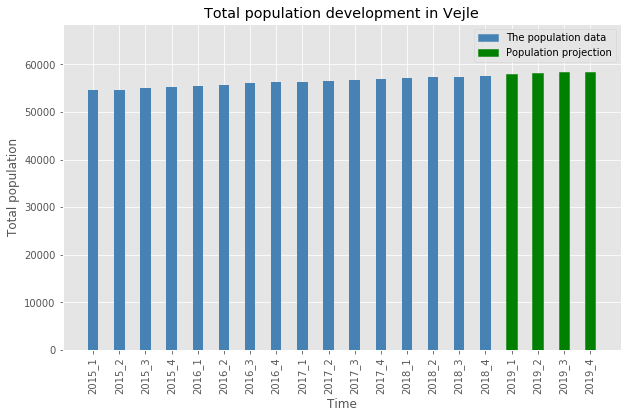

In [519]:
plt.figure(figsize=(10, 6))
bars = plt.bar(x=df_with_projections['year_quarter'],
               height=df_with_projections['totalcitypop'],width=0.4,color = "steelblue")
plt.ylim(top=df_with_projections['totalcitypop'].max()+10000)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0)
bars[16].set_color('g')
bars[17].set_color('g')
bars[18].set_color('g')
bars[19].set_color('g')

plt.xticks([i for i in range(df_with_projections.shape[0])],
           df_with_projections['year_quarter'], rotation='vertical') # range and ticks

blue_patch = mpatches.Patch(color='steelblue', label='The population data')
green_patch = mpatches.Patch(color='green', label='Population projection')

plt.legend(handles=[blue_patch,green_patch])
#plt.gca().legend(('y0','y1'))
plt.ylabel('Total population')
plt.xlabel('Time')
plt.title('Total population development in Vejle')
plt.show()

In the plot above we can see a steady growth represented with green in the population, based on the predictions.

Now, we choose to split the data-frame into the 24 cities, and then add for each add the four quarters along with the prediction:

In [407]:
frames = []

for j in range(len(focuscities)):
    df_proj = data2.loc[data1["city"] == focuscities[j],]
    df_to_add = pd.DataFrame(columns=['city','totalcitypop','latitude','longitude','year_quarter'],
    data = np.zeros((4,5)))
    df_with_projections = pd.concat([df_proj,df_to_add],ignore_index=True)
    for i in range(1,5):    
        df_with_projections.loc[i+15,'year_quarter'] = yearquaters[i-1]
        df_with_projections.loc[i+15,'totalcitypop'] = citypop_projections[j,i-1] # should only grab the last 4 obs of 19 
    for i in range(16,20):
        df_with_projections.loc[i,'city'] = focuscities[j]
        df_with_projections.loc[i,'latitude'] = df_with_projections.loc[0,'latitude']
        df_with_projections.loc[i,'longitude'] = df_with_projections.loc[0,'longitude']
    frames.append(df_with_projections)

#print(frames)
data_for_observable = pd.concat(frames)
#print(data_for_observable)
data_for_observable.to_csv('projections.csv', sep = ',', encoding = 'ANSI', header = True)

Saving the new data set as a csv file with the correct encoding.

In [428]:
df_check = pd.read_csv("projections.csv",sep=';',encoding = "ANSI")
df_check.head()

,city,totalcitypop,latitude,longitude,year_quarter
0,Vejle,54525.0,55.700006,9.533324,2015_1
1,Vejle,54647.0,55.700006,9.533324,2015_2
2,Vejle,54937.0,55.700006,9.533324,2015_3
3,Vejle,55176.0,55.700006,9.533324,2015_4
4,Vejle,55490.0,55.700006,9.533324,2016_1


We can now easily visualize the population growth for the 24 cities:

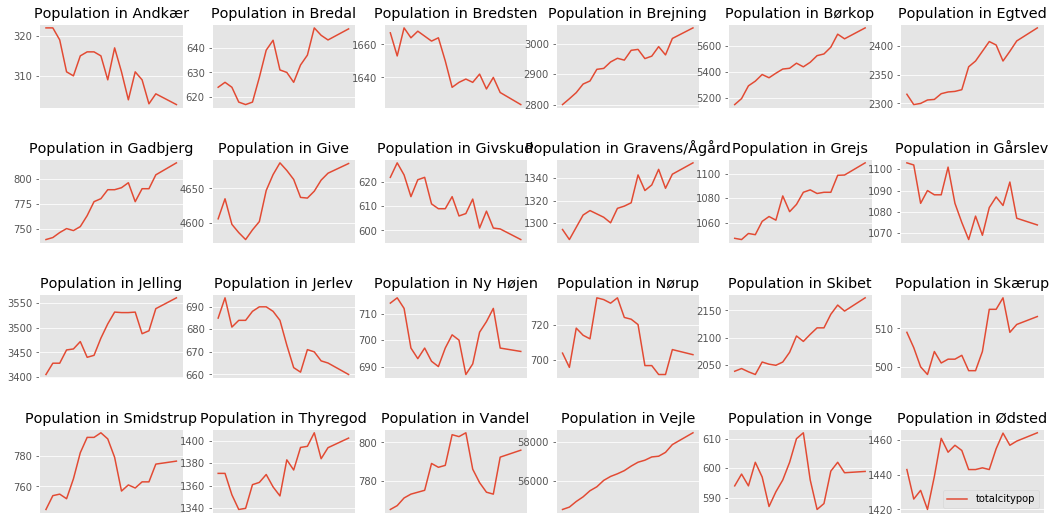

In [592]:
df=df_check[['city','totalcitypop']]
grouped = df.groupby('city')
rowlength = int(grouped.ngroups/4)                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(18,9), 
                        nrows=4, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.6)) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.plot(grouped.get_group(key)['totalcitypop'])
    ax.get_xaxis().set_visible(False)
    ax.set_title('Population in %s'%key)
ax.legend()
plt.show()

*Note that these plots have been scaled differently in terms of their y-axes, so these are overly exaggerated. This is to reveal the overall trend of the different city districts*

What we've learned about the data set is that some cities are changing in terms of size - some a lot more than others. Cities such as Grejs, Skibet and Jelling are growing more rapidly. Some are shrinking, Andkær, Bredsten Jerlev, etc. There may be many reasons for this. There should be no significant policy differences between the high-growth areas and the rest, such as favorable tax benefits, since the districts are all part of the same municipality. However, some areas may just be more "popular" than others, because they have better schools, access to public transportation, libraries, shopping, green areas, kid friendly areas, etc.

### 4. Genre and Implementation
In terms of genre, this narrative visualization will mainly follow the genre, *partitioned poster*. Here, the main goal is to make the reader gain insight by interaction. As our central idea revovles around exploring populations we want to encourage a reader-driven exploratory curiosity in terms of data diagnostics, pattern discovery, and hypothesis formation. In each of the visualizations the reader can dig at their own pace into different perspectives of the population distribution that appear in a natural order (user directed path) and contain filters and feature selection (filtering) which adds movement to the visualizations and gives a unique experience to the reader. 

The visualizations work as a consistent platform, since the moments that the reader can observe occur only inside the visualizations, the structure stays the same. For example, in the map the user is able to select the date in a drop down menu and will observe differences in the size of the circles on the map, where bigger circles represent bigger populations (feature distinction). Even though the circles change size the map structure is static (consistent visual platform). In order to improve the reader experience we also provided some annotations on how to better use the visualizations which intuitively gives to the reader the directions for the order of the visualizations. The objective is that in after reading our report the user can see what are the cities with bigger population in the district of Vejle, what are the future tendencies and how are their population distributed.


Regarding the implementation of the above, this was inspired by the CRISP methodology, where we start with the data understanding. In this stage we have a look at the data and we describe it in terms of its format, its quantity and the identities of the fields. We evaluate whether the data satisfies the requirements needed to carry out the project. This stage is followed by the data preparation by handling missing values, a very important step to increase the data quality. Furthermore, a lot of formatting has to be done so we are able to implement it directly in Observable. Having this step finished we move to the modeling part of the project where an algorithm is implemented. In this case the objective is to forecast the population size in the different cities in the next year. To check the performance of the model, error measures should be used on the observed data, which consists in the Evaluation fase. All these steps will occur using on the Python Notebooks.
With the data prepared and our model implemented we will upload our data to GitHub in order to use it in the Observable Notebooks where we will finally develop more develop and complex visualizations that cannot be created on Python Notebooks.

### 5. Visualizations

- A map with a brushing feature showing population sizes. The geographical map feature was chosen because our data contains locations (longitude and latitude). The maps can be supported by other charts, as well.

- The reason for the bubble chart is that these are more refined than a scatterplot - the size of the data points (bubbles) adds an extra dimension.

- Gender ratio in a tornado diagram
- Quarterly development of the population in a barchart. These vertical barcharts are used to compare data across several quarters in the different cities.
- Prognosis of population development incorporated in the barcharts, the prognisis have a different color so you can directly see what is going to happen in the future

These visualizations make it easier to identify trends, patterns, find exceptions and compare groups. These visualizations are meant to improve decision making, collaboration and information sharing within Vejle Kommune.

### 6. Discussion

At the start of The project, we only had data from portal.opendata.dk, and a lot of observations and quarters were missing. However, we were able to get access to more data from Cecilie Fischer, analysis consultant in Digitalisering & Analyse in Økonomi-, Arbejdsmarkeds- & Sundhedsforvaltningen. This enabled us to do the predictions in the IPython Explainer Notebook. Working with observable, however, was more challenging than expected. We wanted to keep the data analysis simple by doing a linear regression so that we could more effort into observable, which was definitely needed.

First of all, we wanted to somehow include the growthrates in a meaningful way. We could have added a new map (so it would not disturb the brush feature), where the bubbles were colored "red" and "green" for shrinking and growing population districts.

We also wanted to scale the bubbles in the plot better. However, since the city of Vejle is _much_ larger than the others, this simply was not possible. If we made it too large, it covered some of the nearby cities, and similarly if we made the others smaller, some would simply disappear. So we chose something in between, which is not entirely representative, but it enables us to show some difference between the cities.

While doing the population pyramid one of the biggest difficulties was to convert our dataset to the correct format for the pyramid visualization. The observable part was like trial and error, which was also rather time consuming. Multiple prototypes were tested in order to see how the dataset could fit the plot. 

We also had some challenges regarding the data inside the Observable. Since the visualizations are connected, a considerable amount of time was spent on getting information from the other plots or filters and apply them in the data for the pyramid or the bar charts. Moreover, the pyramid was not something that was tested and practiced in classm and there are very few examples and little documentation on this kind of plot, which made it even more challenging.

Additionally, working with a map in a json file in Observable was difficult, but it was the most important one of our visualizations. Especially the "mouseover" of the cities, which we actually failed to implement in time.

### 7. Future Work
Regarding the regression model, one could assume that the linear assumption is too simple. Also, we could have considered other factors. Immigration and emigration rates are not taken into account, both within the municipality but also in and out. Additionally, birth and mortality rates are not included in this model. Other factors of interest that may have an effect on the population development in the different cities:

- the amount of jobs in the municipality
- the average residence time
- employment rates
- housing prices
- educational institutions
- retirement homes

we should consider adding some noise to the predictions, to make them look more like the real data. We should also include the 95 % confidence intervals.

An interesting approach to the population flow between the city districts could interesting to look at to better identify the most popular and unpopular parts of the city. This could be simulated with differential equations and sytemdynamics.

### 8. Contribution statement
-  Video: https://www.powtoon.com/online-presentation/bZBpPDMyecp/?mode=movie#/ (Clara)
-  Explainer Notebook - section 1 to 9 (Clara)
-  Comments/guide in Observable (Clara)
-  Map with scatterplot - observable notebook (Christian)
-  Barcharts + tornado diagram - observable notebook (Miguel)


### 9. References
[1] David F. Hendry and Bent Nielsen: *'Econometric Modeling - a likelihood approach'*, 2007

[2]  Edward Segel and Jeffrey Heer: *'Narrative Visualization: Telling Stories with Data'*, 2010, http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf

[3]  Population data: https://portal.opendata.dk/dataset/folketal-fordelt-pa-postnummer?fbclid=IwAR3bN4-oc_vvQotNc9uUByW5YXOTszGRNkiotXFpypZEZ7ht_Zmcjnp1Sk

[4] Longitudes and latitudes: https://www.gps-coordinates.net/

[5] Video tool: https://www.powtoon.com